111
(512, 512)


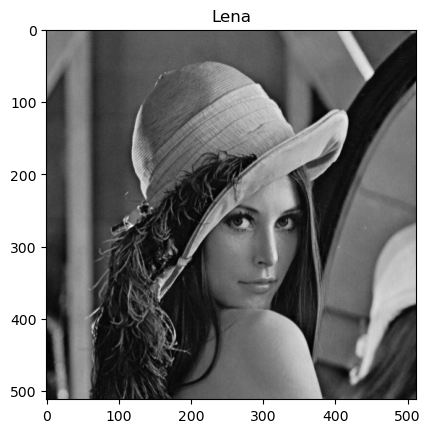

In [1]:
#Leemos la imagen original
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


plt.rcParams['image.cmap'] = 'gray'
image = io.imread('images/lena.tiff')

plt.imshow(image)
plt.title('Lena')

print(image[100][200])
print(image.shape)

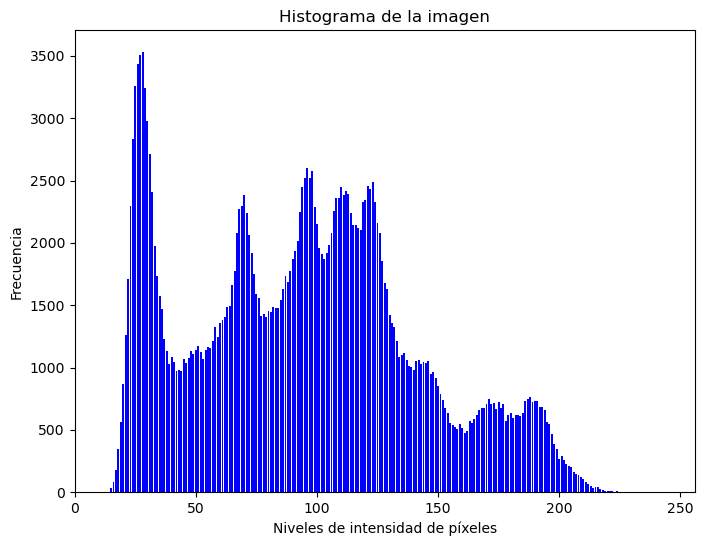

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def calcula_histograma(image):
    # Inicializa un array de frecuencias con ceros
    histogram = np.zeros(256, dtype=int)
    
    # Recorre la imagen y actualiza las frecuencias
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = int(np.floor(image[i, j]).astype(int))
            histogram[pixel_value] += 1
    
    return histogram

def imprime_histograma(histogram):
    # Grafica el histograma usando matplotlib
    plt.figure(figsize=(8, 6))
    plt.bar(range(256), histogram, color='b')
    plt.xlabel('Niveles de intensidad de píxeles')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de la imagen')
    plt.xlim([0, 256])
    plt.show()

histograma = calcula_histograma(image)
imprime_histograma(histograma)



In [3]:
# Aplicar la transformación negativa
def negativa(imagen):

    plt.imshow(image)
    imagen_copia = image
    imagen_negativa = 255 - image
    
    # Mostrar la imagen original y la imagen negativa
    plt.imshow(imagen_negativa)
    
    histograma = calcula_histograma(imagen_negativa)
    imprime_histograma(histograma)


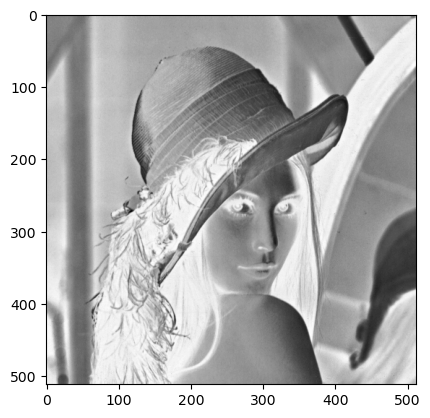

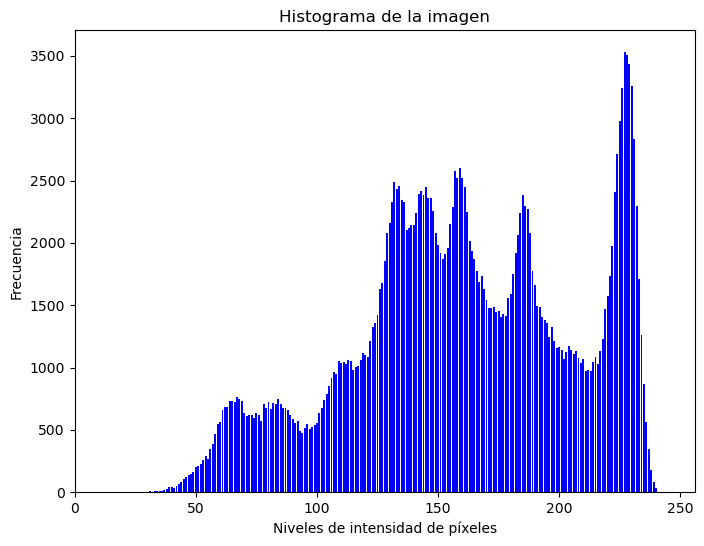

In [4]:
negativa(image)

In [85]:
def logaritmica(imagen):

    plt.imshow(image)
    imagen_copia = image
    imagen_log = np.floor(40 * np.log(1 + image))
    
    # Mostrar la imagen original y la imagen negativa
    print(imagen_log)
    plt.imshow(imagen_log)
    
    
    histograma = calcula_histograma(imagen_log)
    imprime_histograma(histograma)

[[195. 195. 194. ... 198. 192. 182.]
 [195. 195. 194. ... 197. 192. 182.]
 [195. 195. 195. ... 197. 192. 182.]
 ...
 [127. 128. 133. ... 171. 169. 169.]
 [127. 127. 137. ... 172. 172. 174.]
 [127. 127. 137. ... 172. 172. 174.]]


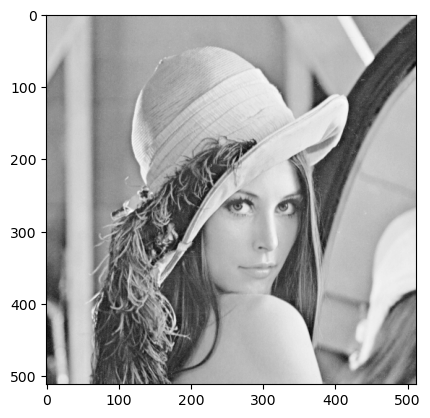

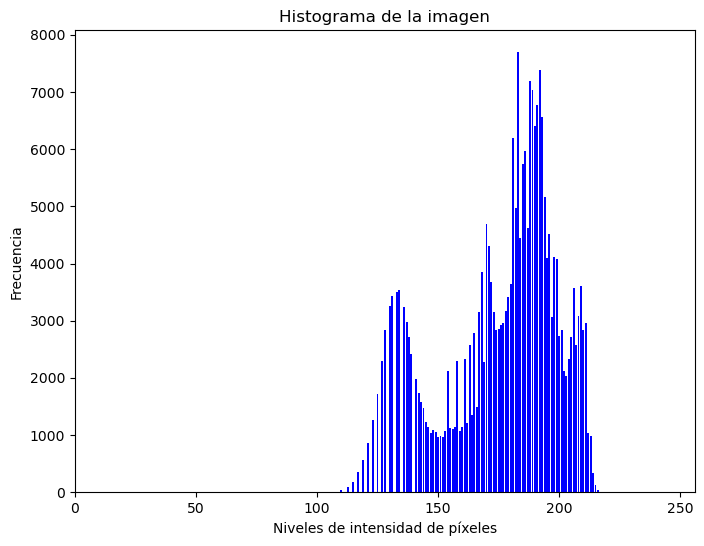

In [86]:
logaritmica(image)

In [7]:
def exponencial(imagen):
    imagen_exp = 10 * (np.exp((imagen / 255) - 1))
    
    # Mostrar la imagen original y la imagen negativa
    plt.imshow(imagen_exp)
    
    histograma = calcula_histograma(imagen_exp)
    imprime_histograma(histograma)

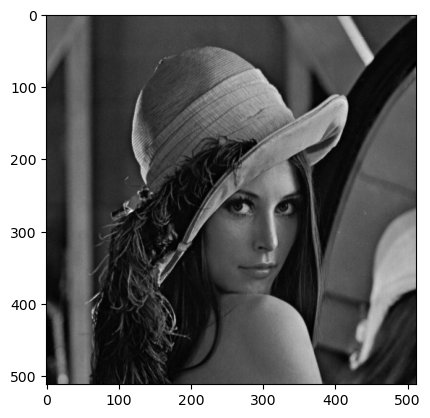

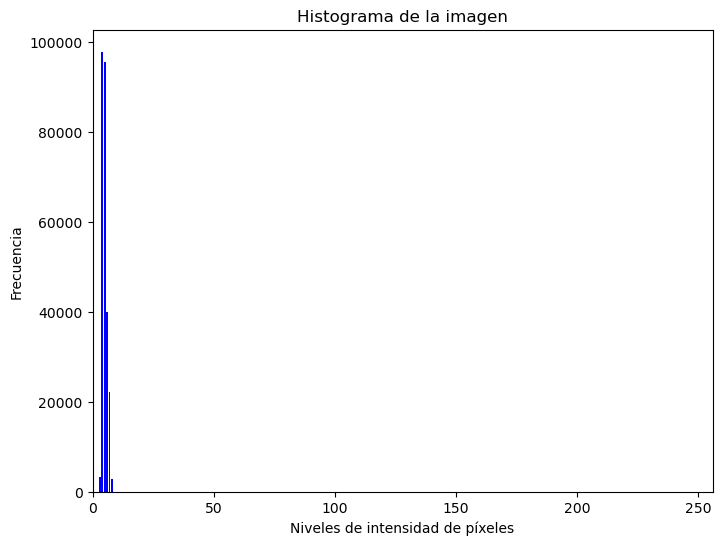

In [8]:
exponencial(image)

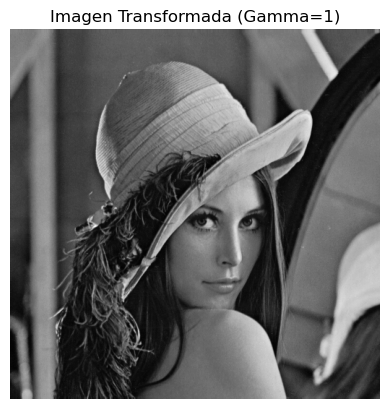

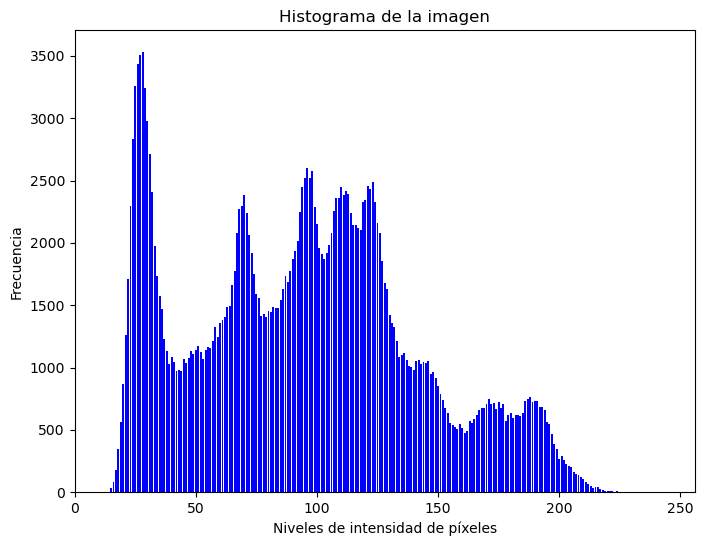

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def transformacion_gamma(imagen, gamma):
    """
    Aplica la transformación gamma a una imagen.
    """
    imagen_transformada = 255 * np.power(imagen / 255, gamma)
    
    # Mostrar la imagen original y la imagen transformada
    plt.imshow(imagen_transformada)
    plt.title(f'Imagen Transformada (Gamma={gamma})')
    plt.axis('off')
    plt.show()
    
    histograma = calcula_histograma(imagen_transformada)
    imprime_histograma(histograma)



# Parámetro gamma para la transformación gamma 
gamma = 1

# Aplicar transformación gamma
transformacion_gamma(image, gamma)


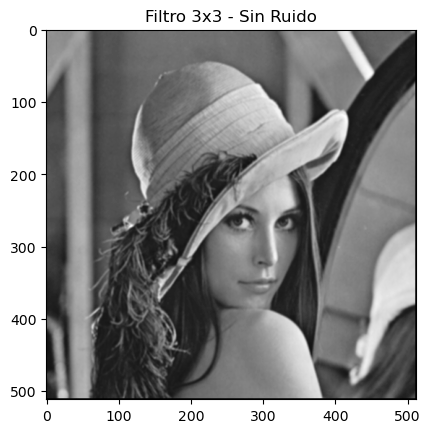

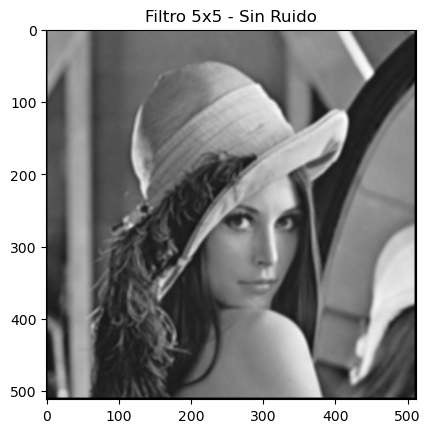

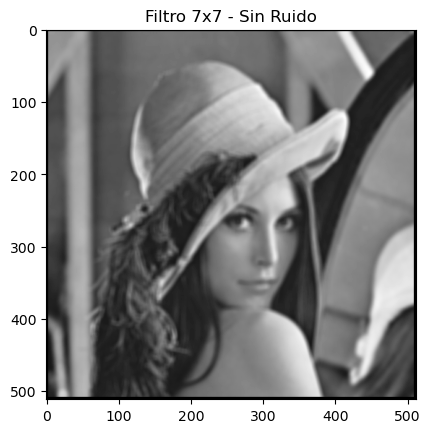

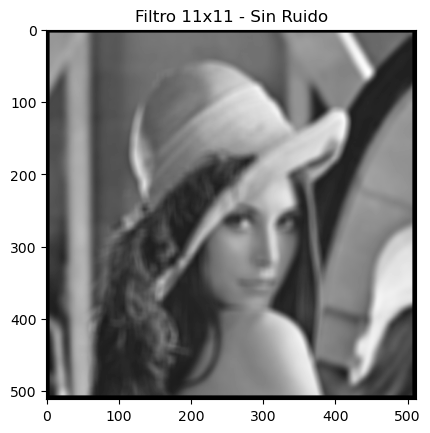

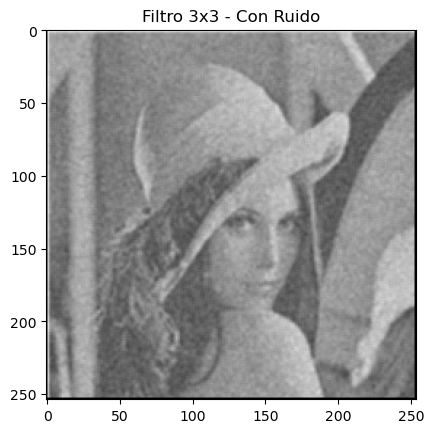

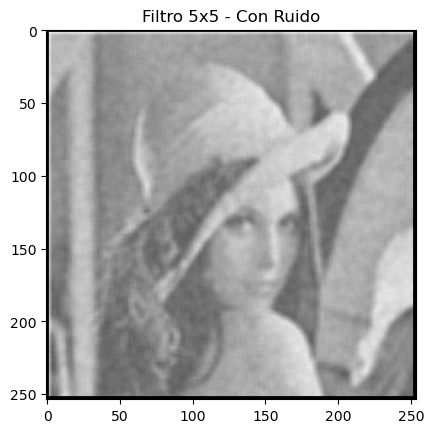

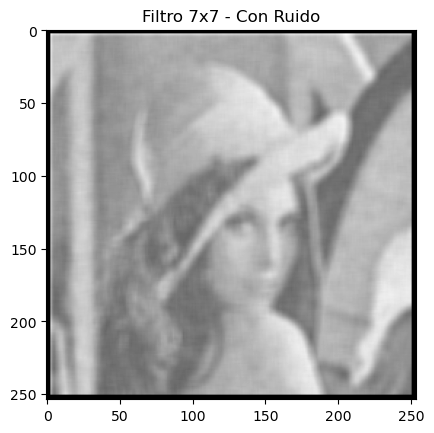

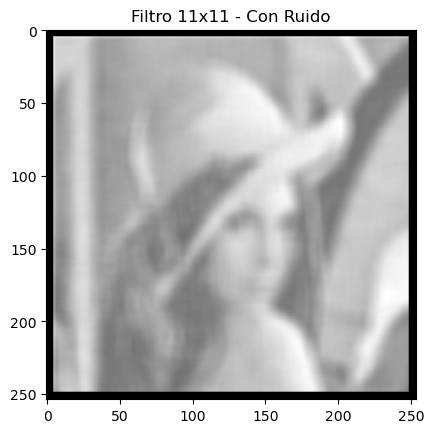

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

imagen_sin_ruido = io.imread('images/lena.tiff')
imagen_con_ruido = io.imread('images/imageedit_1_8337925757.png')




# Función para aplicar filtro promedio
def filtro_promedio(imagen, kernel):
    rango = kernel // 2
    altura, ancho = imagen.shape
    resultado = np.zeros_like(imagen, dtype=np.float64)
    
    for i in range(rango, altura - rango):
        for j in range(rango, ancho - rango):
            # Extraer la región de la imagen
            region = imagen[i - rango:i + rango + 1, j - rango:j + rango + 1]
            
            # Calcular el promedio 
            suma = 0
            total_pixeles = 0
            for fila in region:
                for pixel in fila:
                    suma += pixel
                    total_pixeles += 1
            
            # Calcular el promedio de la región
            promedio = suma / total_pixeles
            
            # Almacenar el promedio en el resultado
            resultado[i, j] = promedio
    
    return resultado



# Tamaños de los filtros
tamanos_filtros = [3, 5, 7, 11]

# Se aplican filtros promedio a la imagen sin ruido
for tamano in tamanos_filtros:
    imagen_suavizada_sin_ruido = filtro_promedio(imagen_sin_ruido, tamano)
    plt.figure()
    plt.imshow(imagen_suavizada_sin_ruido)
    plt.title(f'Filtro {tamano}x{tamano} - Sin Ruido')
  
# Se aplican filtros promedio a la imagen con ruido
for tamano in tamanos_filtros:
    imagen_suavizada_con_ruido = filtro_promedio(imagen_con_ruido, tamano)
    plt.figure()
    plt.imshow(imagen_suavizada_con_ruido)
    plt.title(f'Filtro {tamano}x{tamano} - Con Ruido')


plt.show()
